In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("env_waselee.tsv", sep='\t|,',engine='python')
data.head()

,waste,wst_oper,unit,geo\time,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
0,EE_ATD,COL,KG_HAB,AT,:,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0,0.02,0.01,0.01,0
1,EE_ATD,COL,KG_HAB,BE,:,0.04,0.07,0.06,0.24,0.21,0.17,0.15,0.12,0.19,0.03,0,:,:
2,EE_ATD,COL,KG_HAB,BG,:,0.03,0.02,0.02 d,0 d,0.02,0.04,0.03,0.03,0.01,:,:,:,:
3,EE_ATD,COL,KG_HAB,CY,:,0,0,0.08,0.01,0.01,0.02,0.01,0,0,0,0,:,:
4,EE_ATD,COL,KG_HAB,CZ,:,0.01,0.03,0.02,0,0,0.01,0.01,0.01,0,0,0,:,:


### Types de déchets

In [3]:
data[data["waste"]=="EE_ITT"].head()

,waste,wst_oper,unit,geo\time,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
3082,EE_ITT,COL,KG_HAB,AT,:,2.24,2.17,2.12,2.11,2.06,2.09,1.98,1.95,1.88,1.84,1.59,1.37,0.38
3083,EE_ITT,COL,KG_HAB,BE,:,1.9,1.94,1.41,1.64,1.66,1.74,1.88,1.71,1.62,1.52,1.35,1.15,1.02
3084,EE_ITT,COL,KG_HAB,BG,:,0.36,0.49,0.58 d,0.35 d,0.39,0.43,0.32,0.39,0.28,0.61,0.51,:,:
3085,EE_ITT,COL,KG_HAB,CY,:,0.57,0.81,0.37,0.58,0.55,0.61,0.61,0.66,0.32,0.37,0.17,1.14,0.36
3086,EE_ITT,COL,KG_HAB,CZ,:,1.32,1.29,1.18,0.84,0.83,0.96,0.94,1.13,1.18,0.94,0.71,:,:


Signification des sigles. L'explication en anglais comme en français est celle utilisée par les textes légaux.

label | explanation | français
:--- | :--- | :---
TOTAL | Total waste | Total
EE_LHA | Large household appliances | GROS APPAREILS MÉNAGERS
EE_SHA | Small household appliances | PETITS APPAREILS MÉNAGERS
EE_ITT | IT and telecommunications equipment | ÉQUIPEMENTS INFORMATIQUES ET DE TÉLÉCOMMUNICATIONS
EE_CPV | Consumer equipment and photovoltaic panels | MATÉRIEL GRAND PUBLIC ET PANNEAUX PHOTOVOLTAÏQUES
EE_CPV_CON | Consumer equipment | MATÉRIEL GRAND PUBLIC
EE_CPV_PVP | Photovoltaic panels | PANNEAUX PHOTOVOLTAÏQUES
EE_LIT | Lighting equipment | MATÉRIEL D'ÉCLAIRAGE
EE_LIT_GDL | Gas discharge lamps | ??
EE_EET | Electrical and electronic tools | OUTILS ÉLECTRIQUES ET ÉLECTRONIQUES
EE_TLS | Toys, leisure and sports equipment | JOUETS, ÉQUIPEMENTS DE LOISIR ET DE SPORT
EE_MED | Medical devices | DISPOSITIFS MÉDICAUX
EE_MON | Monitoring and control instruments | INSTRUMENTS DE SURVEILLANCE ET DE CONTRÔLE
EE_ATD | Automatic dispensers | DISTRIBUTEURS AUTOMATIQUES

Pour plus d'information sur la liste des appareils inclus dans chaque catégorie, voir l'annexe II de la directive européenne associée : https://eur-lex.europa.eu/legal-content/FR/TXT/?uri=CELEX:32012L0019

### Type de collection

In [4]:
data[data["wst_oper"]=="MKT"].head()

,waste,wst_oper,unit,geo\time,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
194,EE_ATD,MKT,KG_HAB,AT,:,0.27,0.27,0.23,0.18,0.16,0.16,0.15,0.13,0.12,0.14,0.12,0.11,0.06
195,EE_ATD,MKT,KG_HAB,BE,:,0.22,0.21,0.21,0.28,0.22,0.25,0.3,0.26,0.26,0.15,0.07,0.08,0.03
196,EE_ATD,MKT,KG_HAB,BG,:,0.04,0.06,0.05 d,0.04 d,0.02,0.03,0.04,0.02,0.03,:,:,:,:
197,EE_ATD,MKT,KG_HAB,CY,:,0.01,0.02,0.2,0.01,0.01,0.06,0.04,0.03,0.05,0.04,0.15 e,:,:
198,EE_ATD,MKT,KG_HAB,CZ,:,0.1,0.04,0.04,0.06,0.07,0.08,0.07,0.06,0.04,0.06,0.05,:,:


| label | explanation |
| :------ | :-------------- |
| MKT | Products put on the market|
| COL | Waste collected|
| COL_HH |Waste collected from households|
| COL_OTH |Waste collected from other sources|
| TRT |Waste treatment|
| TRT_NAT |Waste treated in the Member State|
| TRT_EU_FOR |Waste treated in another Member State of the EU|
| TRT_NEU |Waste treated outside the EU|
| RCV |Recovery|
| RCY_REU |Recycling and reuse|
| REU |Reuse |

### FLAGS dans les données

Available flags | Meaning
 :--- | :--- 
b | break in time series
c |	confidential 
d |	definition differs, see metadata
e |	estimated 
f |	forecast 
n |	not significant
p |	provisional 
r |	revised 
s |	Eurostat estimate
u |	low reliability 
z |	not applicable 

## Ouvrir le geojson

In [2]:
import geopandas
#si besoin :
#pip install geopandas 
#pip install descartes
gdf=geopandas.read_file("european-union-countries.geojson")
gdf.head()

,labelrank,gu_a3,scalerank,income_grp,wikipedia,woe_id,su_dif,pop_est,sovereignt,pop_year,...,gdp_year,mapcolor7,adm0_dif,admin,abbrev,subregion,mapcolor9,un_a3,name_long,geometry
0,5.0,HUN,0,1. High income: OECD,-99.0,23424844.0,0.0,9905596.0,Hungary,-99.0,...,-99.0,4.0,0.0,Hungary,Hun.,Eastern Europe,1.0,348,Hungary,"POLYGON ((20.98149 48.51686, 21.00650 48.51815..."
1,5.0,CYP,1,2. High income: nonOECD,-99.0,-90.0,0.0,531640.0,Cyprus,-99.0,...,-99.0,1.0,0.0,Cyprus,Cyp.,Western Asia,3.0,196,Cyprus,"MULTIPOLYGON (((33.77399 34.98867, 33.77792 34..."
2,2.0,FRA,0,1. High income: OECD,-99.0,-90.0,0.0,64057792.0,France,-99.0,...,-99.0,7.0,1.0,France,Fr.,Western Europe,9.0,250,France,"MULTIPOLYGON (((55.50131 -20.87322, 55.51401 -..."
3,6.0,SVN,0,1. High income: OECD,-99.0,23424945.0,0.0,2005692.0,Slovenia,-99.0,...,-99.0,2.0,0.0,Slovenia,Slo.,Southern Europe,2.0,705,Slovenia,"POLYGON ((16.34343 46.71418, 16.35728 46.71583..."
4,3.0,IRL,0,1. High income: OECD,-99.0,23424803.0,0.0,4203200.0,Ireland,-99.0,...,-99.0,2.0,0.0,Ireland,Ire.,Northern Europe,2.0,372,Ireland,"MULTIPOLYGON (((-9.82409 51.63890, -9.81697 51..."


In [6]:
gdf.columns

Index(['labelrank', 'gu_a3', 'scalerank', 'income_grp', 'wikipedia', 'woe_id',
       'su_dif', 'pop_est', 'sovereignt', 'pop_year', 'homepart', 'region_wb',
       'adm0_a3', 'continent', 'adm0_a3_us', 'gdp_md_est', 'brk_name',
       'mapcolor8', 'name_sort', 'wb_a3', 'formal_en', 'sov_a3', 'tiny',
       'geounit', 'adm0_a3_is', 'iso_n3', 'brk_a3', 'abbrev_len', 'adm0_a3_wb',
       'type', 'adm0_a3_un', 'long_len', 'economy', 'featurecla', 'mapcolor13',
       'fips_10', 'woe_id_eh', 'brk_diff', 'wb_a2', 'region_un', 'lastcensus',
       'iso_a3', 'iso_a2', 'woe_note', 'postal', 'geou_dif', 'name_len',
       'subunit', 'name', 'su_a3', 'level', 'gdp_year', 'mapcolor7',
       'adm0_dif', 'admin', 'abbrev', 'subregion', 'mapcolor9', 'un_a3',
       'name_long', 'geometry'],
      dtype='object')

<AxesSubplot:>

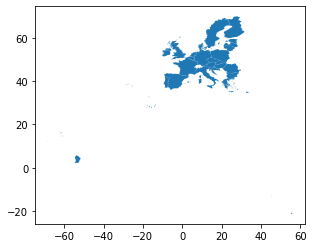

In [8]:
gdf.plot()